## Assignment 6
#### Name: Eve Tarpey Date: 08/02/24
-------------------------------------------------------------------------------------------------------------------------
We will look at data input and analysis astronomical data.

### Task 1: Open the data table in notepad to inspect the data.

The five columns are:
- Column 1: star ID number
- Column 2: observed parallax, in units of arcseconds.
- Column 3: uncertainty in parallax, in units of milliarcseconds.
- Column 4: apparent V magnitude, mV
- Column 5: observed B-V colour, mB − mV





















In [72]:
# define the file path
file_path = "C:\\Users\\Eve\\Documents\\StarData (1).tsv"     

# open the file using a with statement to ensure it's closed properly
with open(file_path) as star_data:
    lines = star_data.read().splitlines()               # read the file line by line and split into lines

# initialize empty lists to store the data from the file, they are strings so define them with "str"
star_id_str = []
parallax_str = []
parallax_err_str = []
apparent_mag_str = []
bv_colour_str = []

# loop through each line in the file and append data from each column to respective lists
for line in lines:
    columns = line.split('\t')                           # split each line into columns based on tab separation
    
    star_id_str.append(columns[0])
    parallax_str.append(columns[1])
    parallax_err_str.append(columns[2])
    apparent_mag_str.append(columns[3])
    bv_colour_str.append(columns[4])

# convert string lists to float lists
star_id = [float(value) for value in star_id_str]
parallax = [float(value) for value in parallax_str]
parallax_err = [float(value) for value in parallax_err_str]
apparent_mag = [float(value) for value in apparent_mag_str]
bv_colour = [float(value) for value in bv_colour_str]

















### Task 2: Make a colour-magnitude diagram.

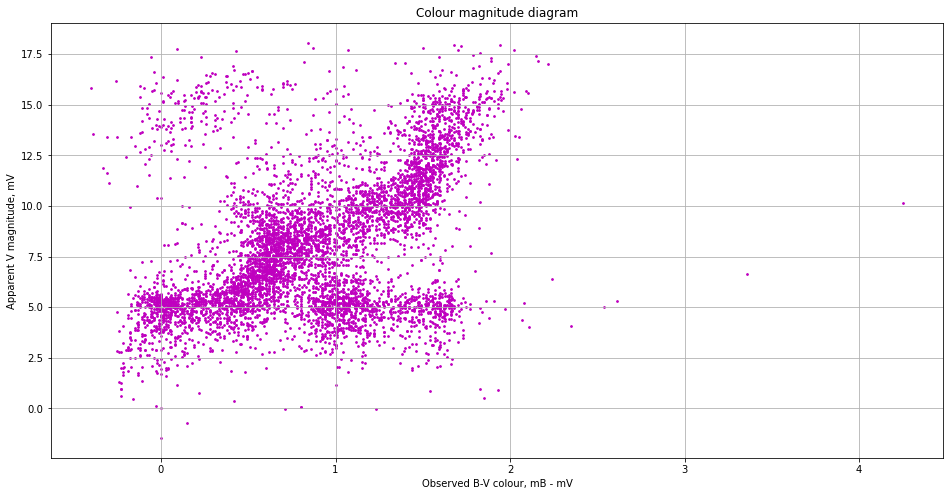

In [71]:
import numpy as np                                      # import numpy as np to use mathematical operations
import matplotlib.pyplot as plt                         # import matplotlib.pyplot as plt to plot our graph 
%matplotlib inline

plt.figure(figsize=(16, 8))                             # to enlarge the graph
plt.scatter(bv_colour, apparent_mag, s=3, c="m")        # adjusting marker size to 3 to see the points clearly
plt.title("Colour magnitude diagram")                   # to title the graph
plt.xlabel("Observed B-V colour, mB - mV")              # x axis label
plt.ylabel("Apparent V magnitude, mV")                  # y axis label
plt.grid()                                              # to display a grid
plt.show()                                              # to show the graph









### Task 3: Creating a new data set for replotting to resemble the Hertzprung-Russel diagram
The absolute magnitude (M) can be determined from the formula:
$$ m − M = 5 log(\frac{d}{10})$$
$$ M = m - 5 log(\frac{d}{10}) $$
Where  $d = \frac{1}{p}$ 

#### On the diagram, count the number of the following stars and determine the approximate percentage of each type.
- Red giant stars
- Main sequence stars
- White dwarf stars 


Assuming that I can read the values off of a Hertzprung-Russel diagram, I found one on wikipedia, which you can see below. I could not clearly read the values from the diagram in the background slides so I will be using values from this graph:

![Hertzprung-Russel Diagram](https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png)

-  White Dwarf stars occur between observed BV colour between -0.2 and 1.2, and have absolute magnitude range between 10 and 16.

- Main sequence stars occur between observed BV colour between -0.2 and 2, and have absolute magnitude range between -3 and 16.

- Red giant stars occur between observed BV colour between 0 and 1.8, and have absolute magnitude range between -3.5 and -1.

This is a very crude approach, and may not be correct.

Number of Red Giant Stars: 230, approximate percentage of Red Giant Stars: 3.699%
Number of Main Sequence Stars: 5014, approximate percentage of Main Sequence Stars: 80.637%
Number of White Dwarf Stars: 962, approximate percentage of White Dwarf Stars: 15.471%


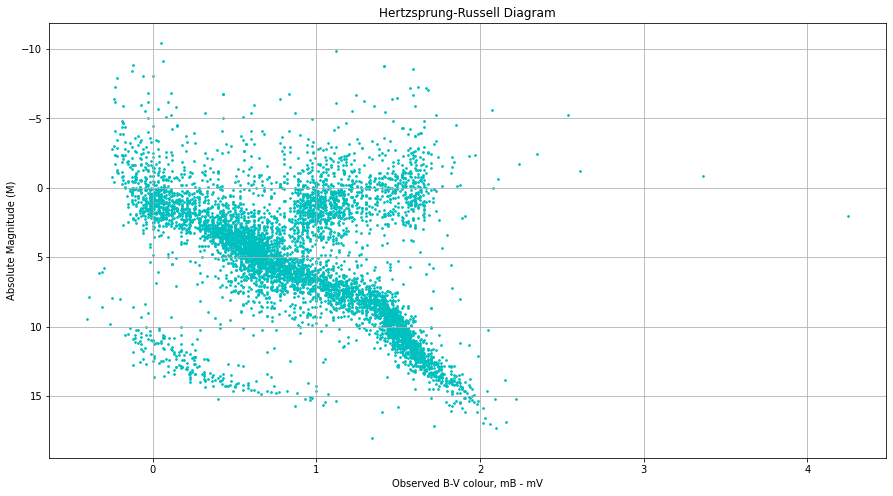

In [58]:
# create empty arrays to store the calculated distances and absolute magnitudes of stars
star_distance = []                         
absolute_magnitude = []  

# calculate the distance to each star (d) using the parallax angle (p) and append it to the "star_distance" array
for p in parallax:
    d = 1/p                                                            # distance in parsecs
    star_distance.append(d)
    
# calculate the absolute magnitude (M) of each star using the distance to the star (d) and apparent magnitude (m)
for i in range(len(apparent_mag)):
    M = apparent_mag[i] - (5 * np.log10(star_distance[i] / 10))        # using formula in markdown
    absolute_magnitude.append(M)

number_stars = len(bv_colour)                                          # number of stars

# create empty arrays to store indices of classified stars
RedGiants = []
WhiteDwarfs = []
MainSequence = []

# loop through stars and classify them into Red Giants, Main Sequence, or White Dwarfs based on B-V colour and M
for i in range(number_stars):
    if 0 <= bv_colour[i] <= 1.8 and -3.5 <= absolute_magnitude[i] <= -1:
        RedGiants.append(i)
    elif -0.2 <= bv_colour[i] <= 2 and 10 <= absolute_magnitude[i] <= 16:
        WhiteDwarfs.append(i)
    elif -0.5 <= bv_colour[i] <= 2.2 and -10 <= absolute_magnitude[i] <= 17:
        MainSequence.append(i)

# count the number of stars in each category and calculate the total number of stars
numberRG = len(RedGiants)
numberMS = len(MainSequence)
numberWD = len(WhiteDwarfs)
total_stars = number_stars

# calculate the percentage of stars in each category based on the total number of stars
percentageRG = (numberRG / total_stars) * 100
percentageMS = (numberMS / total_stars) * 100
percentageWD = (numberWD / total_stars) * 100

# print the counts and percentages of Red Giants, Main Sequence, and White Dwarfs
print(f"Number of Red Giant Stars: {numberRG}, approximate percentage of Red Giant Stars: {percentageRG:.3f}%")
print(f"Number of Main Sequence Stars: {numberMS}, approximate percentage of Main Sequence Stars: {percentageMS:.3f}%")
print(f"Number of White Dwarf Stars: {numberWD}, approximate percentage of White Dwarf Stars: {percentageWD:.3f}%")

# plot the Hertzsprung-Russell diagram using B-V colour and absolute magnitude (M) data

plt.figure(figsize=(15, 8))                                  # to enlarge the graph
plt.scatter(bv_colour, absolute_magnitude, s=3, c='c')       # adjusting marker size to 3 to see the points clearly
plt.gca().invert_yaxis()                                     # invert y-axis to represent luminosity
plt.title("Hertzsprung-Russell Diagram")                     # title the graph
plt.xlabel("Observed B-V colour, mB - mV")                                     # label the xaxis
plt.ylabel("Absolute Magnitude (M)")                         # label the yaxis
plt.grid()                                                   # to display a grid
plt.show()                                                   # to show the graph


The diagram is quite similar to the one in the background slides, so i will assume that the graph i read from was approximately correct.

### Task 4: 
The absolute magnitude of the sun is 4.83. Using this
information, on the right hand vertical axis (ideally, or you just change the y-axis)
also display the luminosity scale for the stars in your colour magnitude diagram
in units of solar luminosities. Recall from above, a factor 100 in luminosity is 5
magnitudes. This will allow you to see the range of luminosities of these stars.


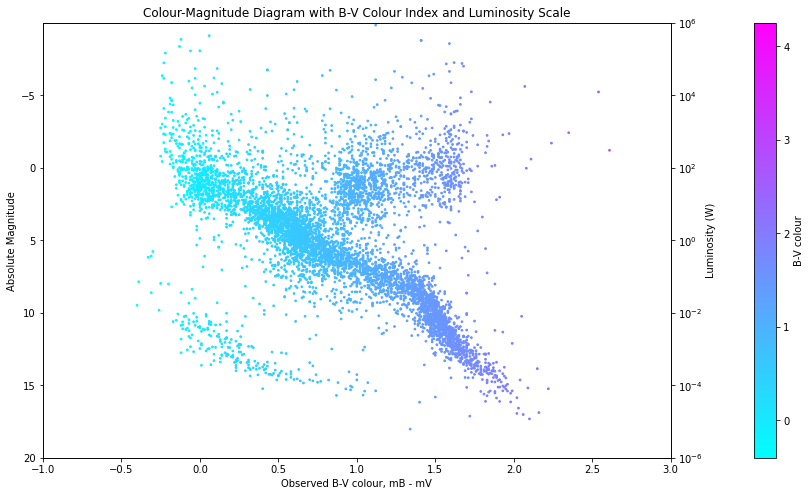

In [68]:
# absolute magnitude of the Sun
absolute_magnitude_sun = 4.83

fig, ax1 = plt.subplots(figsize=(15, 8))

# scatter plot with B-V colour index as marker colour and luminosity scale
scatter_plot = ax1.scatter(bv_colour, absolute_magnitude, s=3, c=bv_colour, cmap="cool")

# invert y-axis
ax1.invert_yaxis()

# set y-axis ticks and limits
ax1.set_yticks(np.arange(-5, 26, 5))
ax1.set_ylim(20, -10)

# set x-axis limits and labels
ax1.set_xlim(-1, 3)
ax1.set_xlabel("Observed B-V colour, mB - mV")

# set y-axis label to the absolute magnitude
ax1.set_ylabel("Absolute Magnitude")

# create a twin axis for the luminosity scale
ax2 = ax1.twinx()

# define the luminosity scale ticks
ax2_ticks = [1e-6, 1e-4, 1e-2, 1, 1e2, 1e4, 1e6]

# set the twin axis to logarithmic scale and set ticks and labels
ax2.set_yscale("log")
ax2.set_yticks(ax2_ticks)
ax2.set_ylabel("Luminosity (W)")

# add colourbar for B-V colour index
cbar = plt.colorbar(scatter_plot, label="B-V colour", ax=ax1, pad=0.1)

plt.title("Colour-Magnitude Diagram with B-V Colour Index and Luminosity Scale")
plt.show()


A summary of this code as it was quite complicated (for me anyways!!):
- A scatter plot is created with the B-V color index as the marker colour and the luminosity scale as the size of the markers.
- The y-axis is inverted to represent luminosity correctly.
- A twin axis is created for the luminosity scale with logarithmic scale and appropriate ticks.
- The colourbar is added to represent the B-V color index.
- The plot is displayed with appropriate titles and labels.